In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../dataset/dataset.csv')

<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 1. EDA📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">



In [3]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [5]:
# drop null values
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 13392
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            12205 non-null  int64  
 1   title                         12205 non-null  object 
 2   url                           12205 non-null  object 
 3   is_paid                       12205 non-null  bool   
 4   num_subscribers               12205 non-null  int64  
 5   avg_rating                    12205 non-null  float64
 6   avg_rating_recent             12205 non-null  float64
 7   rating                        12205 non-null  float64
 8   num_reviews                   12205 non-null  int64  
 9   is_wishlisted                 12205 non-null  bool   
 10  num_published_lectures        12205 non-null  int64  
 11  num_published_practice_tests  12205 non-null  int64  
 12  created                       12205 non-null  object 
 13  p

In [7]:
df['title'].value_counts()

Project Management Fundamentals                             2
Learn Machine Learning From Scratch                         2
Performance Management                                      2
Cold Calling Mastery                                        2
Practice the IIBA CBAP Exam: 240 Quality Questions, 2020    2
                                                           ..
The Agile Bootcamp: Agile Delivery | Agile Case Studies     1
Successfully Transitioning Into Supervision                 1
Sales Training: Master Your Sales Pitch                     1
eBay Selling Home Business Powerseller Secrets and Hacks    1
A Matemática para investir                                  1
Name: title, Length: 12174, dtype: int64

In [8]:
# make it lower case and remove special characters
df['title'] = df['title'].apply(lambda x: x.lower())
df['title'] = df['title'].str.replace('[^a-z0-9\s]', '')

df['title'].value_counts()

                                                               62
                                                               13
                                                               10
                                                                6
                                                                6
                                                               ..
build a popular  powerful business or personal brand online     1
selling products locally learn to sell your products online     1
leadership mastery simple uncommon leadership strategies        1
introduction to pmp  project management professional exam       1
a matemtica para investir                                       1
Name: title, Length: 12054, dtype: int64

In [9]:
columns_to_drop = [
    'id', 'avg_rating', 'url', 'created', 'num_published_lectures', 
    'discount_price__currency', 'discount_price__amount', 'published_time', 
    'is_paid',  'discount_price__price_string', 
    'price_detail__currency', 'price_detail__price_string' , 'avg_rating_recent'
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

rating = df['rating']
df.drop(columns=['rating'], axis=1, inplace=True)
df['rating'] = rating
df.head()

,title,num_subscribers,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount,rating
0,the complete sql bootcamp 2020 go from zero to...,295509,78006,False,0,8640.0,4.67874
1,tableau 2020 az handson tableau training for d...,209070,54581,False,0,8640.0,4.60015
2,pmp exam prep seminar pmbok guide 6,155282,52653,False,2,8640.0,4.59326
3,the complete financial analyst course 2020,245860,46447,False,0,8640.0,4.53772
4,an entire mba in 1 courseaward winning busines...,374836,41630,False,0,8640.0,4.47173


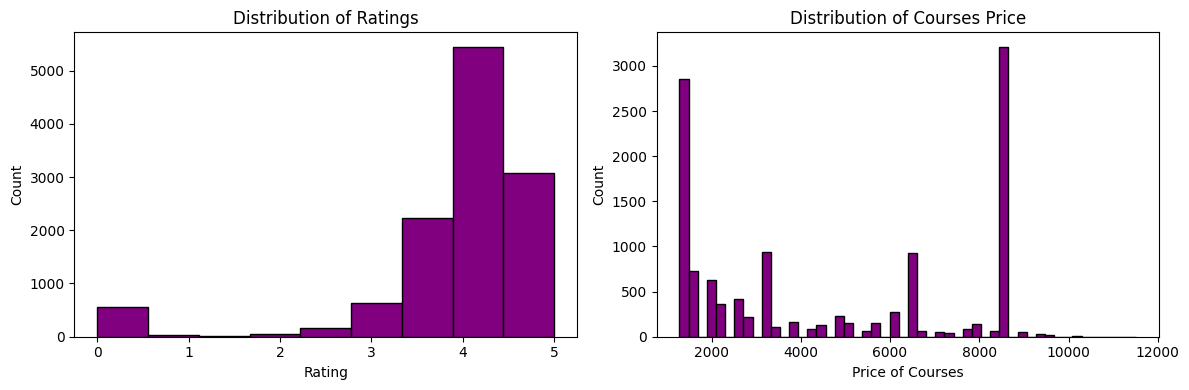

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# histogram for ratings 
axes[0].hist(df['rating'], bins=9, edgecolor='black', color='purple')
axes[0].set_title('Distribution of Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')

# histogram for course prices
axes[1].hist(df['price_detail__amount'], bins=50, edgecolor='black', color='purple')
axes[1].set_title('Distribution of Courses Price')
axes[1].set_xlabel('Price of Courses')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 2. Feature Engineering 📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">

In [11]:
from sklearn.preprocessing import LabelEncoder
le_title = LabelEncoder()
le_wishlist = LabelEncoder()

df['title'] = le_title.fit_transform(df['title']) # I utilize encoding instead of one hot encoding because the title column has a lot of unique values --> (for faster runtime)
df['is_wishlisted'] = le_wishlist.fit_transform(df['is_wishlisted'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 13392
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         12205 non-null  int32  
 1   num_subscribers               12205 non-null  int64  
 2   num_reviews                   12205 non-null  int64  
 3   is_wishlisted                 12205 non-null  int64  
 4   num_published_practice_tests  12205 non-null  int64  
 5   price_detail__amount          12205 non-null  float64
 6   rating                        12205 non-null  float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 715.1 KB


In [13]:
# IQR function
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices

outlier_indices = outliers(df, 'num_subscribers')
# conveert to dataframe
outlier_indices = pd.DataFrame(outlier_indices)
outlier_indices


,0
0,0
1,1
2,2
3,3
4,4
...,...
1441,11857
1442,11877
1443,11889
1444,12039


In [14]:
# scaling the data
scaler = StandardScaler()

X = df.drop('rating', axis=1) # [1:100] --> [-1:1]
y = df['rating'] 

numerical_cols = ['num_subscribers', 'num_reviews', 'price_detail__amount']

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [15]:
X.head()

,title,num_subscribers,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount
0,10910,30.941634,47.424010,0,0,1.328989
1,10452,21.802528,33.137395,0,0,1.328989
2,8547,16.115579,31.961532,0,2,1.328989
3,10822,25.692297,28.176570,0,0,1.328989
4,842,39.328795,25.238742,0,0,1.328989


<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 3. Fitting our Model📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">



In [16]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# mse fo traing and testing data
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE for training data:', mean_squared_error(y_train, train_pred)) 
print('MSE for testing data:', mean_squared_error(y_test, test_pred))

# 0-5
# actual: 3.5 , predict: 3.5 +- 0.27

MSE for training data: 0.03884058055348441
MSE for testing data: 0.27659169531977207


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf.predict(X_test)
# Evaluate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# overfiting:
# training accuracy = 98%
# test accuracy = 60%

Mean Squared Error: 0.27659169531977207
Mean Absolute Error: 0.3750084923938277
R-squared: 0.725772699511702


In [19]:
import joblib

# Save the preprocessed data, encoders, and scaler
joblib.dump(le_title, "le_title.pkl")
joblib.dump(le_wishlist, "le_wishlist.pkl")
joblib.dump(scaler, "scaler.pkl")

# Save the model
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']